In [6]:
!pip3 install matplotlib
!pip3 install nilearn

Downloaded 314803244 of 314803244 bytes (100.0%,    0.0s remaining) ...done. (731 seconds, 12 min)
Extracting data from /root/nilearn_data/haxby2001/b7061e6dfd4459484ab7c3872d37e765/subj1-2010.01.14.tar.gz..... done.


First subject anatomical nifti image (3D) is at: /root/nilearn_data/haxby2001/subj1/anat.nii.gz
First subject functional nifti image (4D) is at: /root/nilearn_data/haxby2001/subj1/bold.nii.gz


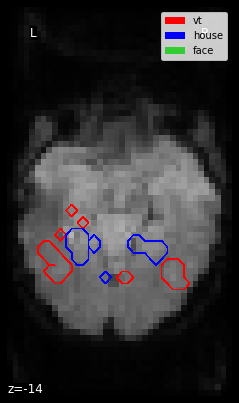

In [16]:
import matplotlib.pyplot as plt

from nilearn import datasets
haxby_dataset = datasets.fetch_haxby(subjects=1)

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

# Build the mean image because we have no anatomic data
from nilearn import image
func_filename = haxby_dataset.func[0]
mean_img = image.mean_img(func_filename)

z_slice = -14
fig = plt.figure(figsize=(4,5.4), facecolor='k')

from nilearn.plotting import plot_anat, show
display = plot_anat(mean_img, display_mode = 'z', cut_coords=[z_slice], figure=fig)

# all masks that you wish to see
mask_vt_filename = haxby_dataset.mask_vt[0]
mask_house_filename = haxby_dataset.mask_house[0]
mask_face_filename = haxby_dataset.mask_face[0]

display.add_contours(mask_vt_filename, contours=1, antialiased=False, linewidths=0.5, levels=[0], colors=['red'])
display.add_contours(mask_house_filename, contours=1, antialiased=False, linewidths=0.5, levels=[0], colors=['blue'])
display.add_contours(mask_face_filename, contours=1, antialiased=False, linewidths=0.5, levels=[0], colors=['limegreen'])

from matplotlib.patches import Rectangle
p_v = Rectangle((0,0), 1, 1, fc='red')
p_h = Rectangle((0,0), 1, 1, fc='blue')
p_f = Rectangle((0,0), 1, 1, fc='limegreen')
plt.legend([p_v, p_h, p_f], ['vt', 'house', 'face'])

show()